In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab

from skimage import data, img_as_float
from skimage import exposure
import cv2
matplotlib.rcParams['font.size'] = 8

In [2]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [3]:
# Load an example image
img = matplotlib.image.imread('piece1.png')
cimg = matplotlib.cm.get_cmap('BrBG')
#img = cv2.imread('piece1.png', cv2.IMREAD_COLOR)

#b, g, r, a    = cv2.split(img) # For BGRA image
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
green_img = RGB_img[:,:,0]   # pseudo color green

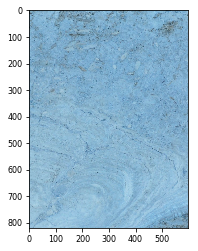

In [4]:
plt.imshow(RGB_img)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


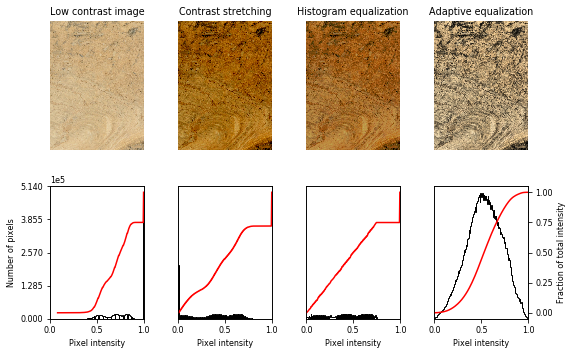

In [5]:
# Contrast stretching
p2, p98 = np.percentile(img, (10, 90))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
matplotlib.image.imsave('img_rescale.png', img_rescale)
 
# Equalization
img_eq = exposure.equalize_hist(img)
matplotlib.image.imsave('img_eq.png', img_eq)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.02)
matplotlib.image.imsave('img_adapteq.png', img_adapteq)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()